In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [6]:
#데이터불러오기
investBM=pd.read_csv('EcoproBM.csv',parse_dates =["Date"]).set_index('Date').sort_index()
investHN=pd.read_csv('EcoproHN.csv',parse_dates =["Date"]).set_index('Date').sort_index()

In [8]:
#데이터 확인
investBM.info()
investHN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 594 entries, 2021-06-04 to 2023-06-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     594 non-null    int64  
 1   Open      594 non-null    int64  
 2   High      594 non-null    int64  
 3   Low       594 non-null    int64  
 4   Vol.      494 non-null    float64
 5   Change %  594 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 32.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 556 entries, 2021-06-04 to 2023-06-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     556 non-null    int64  
 1   Open      556 non-null    int64  
 2   High      556 non-null    int64  
 3   Low       556 non-null    int64  
 4   Vol.      494 non-null    float64
 5   Change %  556 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 30.4 KB


In [11]:
#데이터 컬럼명 지정하고 바꿔주기
col_map_BM = {'Date' : 'Date_BM',
       'Price' : 'Price_BM',
       'Open' : 'Open_BM',
       'High' : 'High_BM',
       'Low' : 'Low_BM',
       'Vol.' : 'Vol._BM',
       'Change %' : 'Change %_BM'}
col_map_HN = {'Date' : 'Date_HN',
       'Price' : 'Price_HN',
       'Open' : 'Open_HN',
       'High' : 'High_HN',
       'Low' : 'Low_HN',
       'Vol.' : 'Vol._HN',
       'Change %' : 'Change %_HN'}
investBM= investBM.rename(columns=col_map_BM)
investHN= investHN.rename(columns=col_map_HN)


In [12]:
investBM.info()
investHN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 594 entries, 2021-06-04 to 2023-06-02
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price_BM     594 non-null    int64  
 1   Open_BM      594 non-null    int64  
 2   High_BM      594 non-null    int64  
 3   Low_BM       594 non-null    int64  
 4   Vol._BM      494 non-null    float64
 5   Change %_BM  594 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 32.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 556 entries, 2021-06-04 to 2023-06-02
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price_HN     556 non-null    int64  
 1   Open_HN      556 non-null    int64  
 2   High_HN      556 non-null    int64  
 3   Low_HN       556 non-null    int64  
 4   Vol._HN      494 non-null    float64
 5   Change %_HN  556 non-null    float64
dtypes: float64(2), int64(4)
me

In [15]:
#데이터프레임 합치기
invest = pd.concat([investBM,investHN],axis=1)

In [16]:
invest.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 597 entries, 2021-06-04 to 2023-06-02
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price_BM     594 non-null    float64
 1   Open_BM      594 non-null    float64
 2   High_BM      594 non-null    float64
 3   Low_BM       594 non-null    float64
 4   Vol._BM      494 non-null    float64
 5   Change %_BM  594 non-null    float64
 6   Price_HN     556 non-null    float64
 7   Open_HN      556 non-null    float64
 8   High_HN      556 non-null    float64
 9   Low_HN       556 non-null    float64
 10  Vol._HN      494 non-null    float64
 11  Change %_HN  556 non-null    float64
dtypes: float64(12)
memory usage: 60.6 KB


In [43]:
#결측값 0으로 채우기 
invest.isna().sum()
invest = invest.fillna(0)

In [44]:
weekly_invest=(
    invest.groupby(pd.Grouper(freq='W')).size()
)
weekly_invest

Date
2021-06-06    2
2021-06-13    6
2021-06-20    6
2021-06-27    6
2021-07-04    6
             ..
2023-05-07    5
2023-05-14    6
2023-05-21    6
2023-05-28    5
2023-06-04    5
Freq: W-SUN, Length: 105, dtype: int64

<AxesSubplot:title={'center':'Ecopro investing'}, xlabel='Date'>

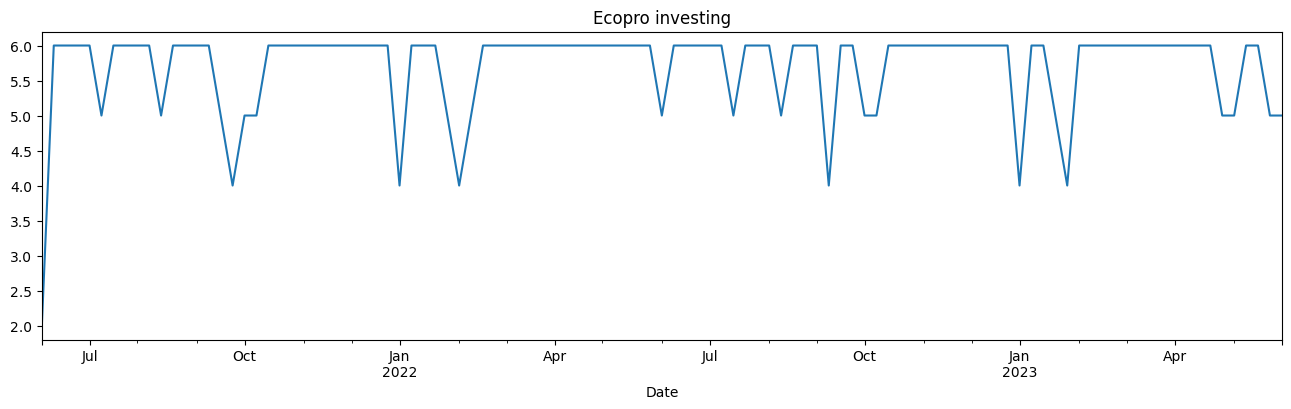

In [45]:
fig, ax = plt.subplots(figsize=(16,4))
weekly_invest.plot(title='Ecopro investing',ax=ax)

In [46]:
invest.columns

Index(['Price_BM', 'Open_BM', 'High_BM', 'Low_BM', 'Vol._BM', 'Change %_BM',
       'Price_HN', 'Open_HN', 'High_HN', 'Low_HN', 'Vol._HN', 'Change %_HN'],
      dtype='object')

In [47]:
(
invest
.resample('Q')
[['Price_BM','Price_HN','Vol._BM','Vol._HN', 'Change %_BM', 'Change %_HN']]
.sum()
)

,Price_BM,Price_HN,Vol._BM,Vol._HN,Change %_BM,Change %_HN
Date,,,,,,
2021-06-30,1714532.0,702350.0,5490.50,4508.06,9.4018,0.0540
2021-09-30,8785388.0,7502100.0,5414.44,8110.41,28.3265,5.3433
2021-12-31,13502586.0,7058700.0,21339.01,8847.74,27.8839,-0.2278
2022-03-31,10035078.0,3705500.0,22937.32,6045.54,27.5629,-0.2529
2022-06-30,13750080.0,3175000.0,25460.58,4104.65,29.8512,-0.3123
2022-09-30,8408300.0,3534700.0,14822.07,10751.37,-0.2225,0.3268
2022-12-31,7889700.0,3499300.0,17800.69,5136.91,0.0698,-0.0841
2023-03-31,11218700.0,3969700.0,5024.58,7986.86,0.9574,0.6220
2023-06-30,12869500.0,3393700.0,6547.27,7231.74,0.1646,-0.1684


<AxesSubplot:title={'center':'invest'}, xlabel='Date'>

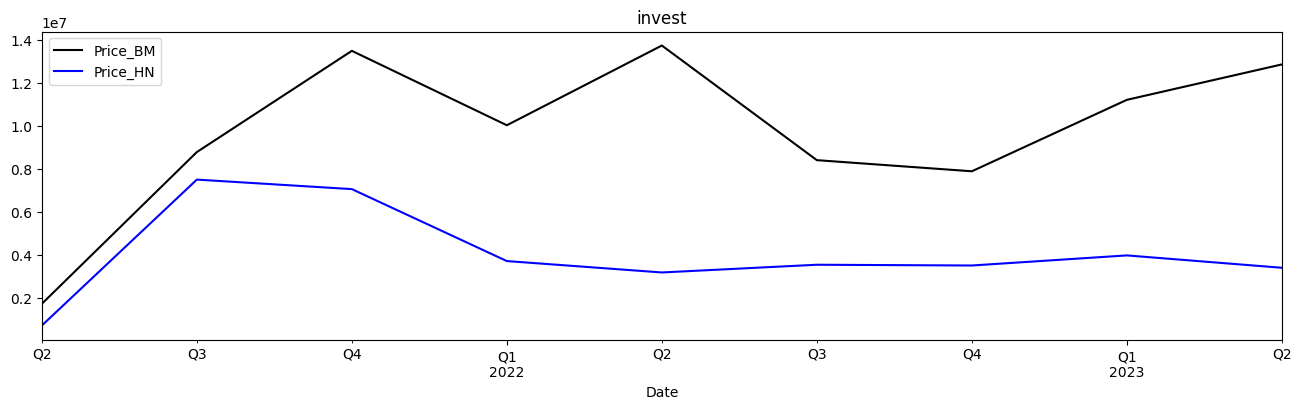

In [32]:
#BM과 HN의 가격 차이 
fig, ax = plt.subplots(figsize=(16,4))
(
    invest
    .resample('Q')
    [['Price_BM','Price_HN']]
    .sum()
    .plot(color=['black','blue'],ax=ax, title='invest')
)

<AxesSubplot:title={'center':'invest'}, xlabel='Date'>

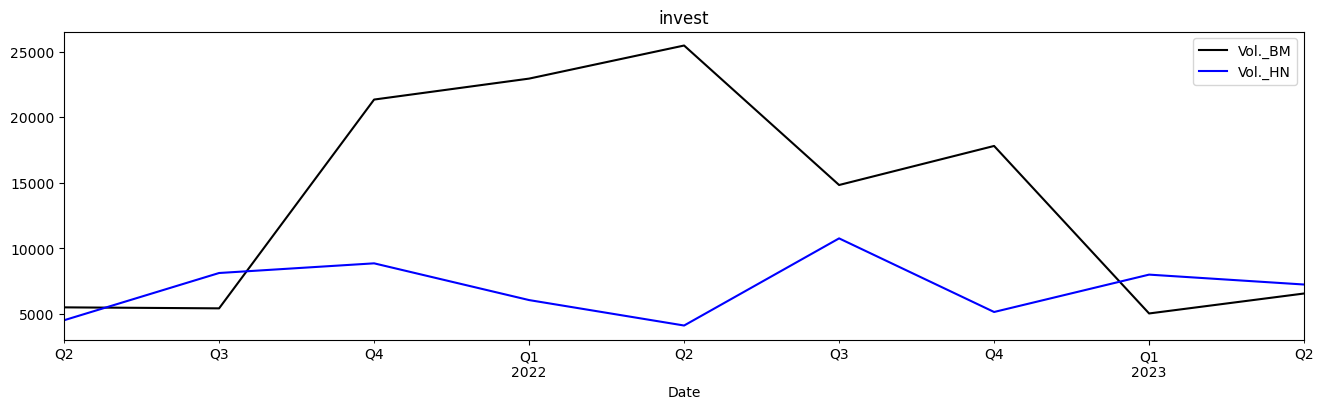

In [48]:
#BM과 HN의 거래량 차이 
fig, ax = plt.subplots(figsize=(16,4))
(
    invest
    .resample('Qs')
    [['Vol._BM','Vol._HN']]
    .sum()
    .plot(color=['black','blue'],ax=ax, title='invest')
)

<AxesSubplot:title={'center':'invest'}, xlabel='Date'>

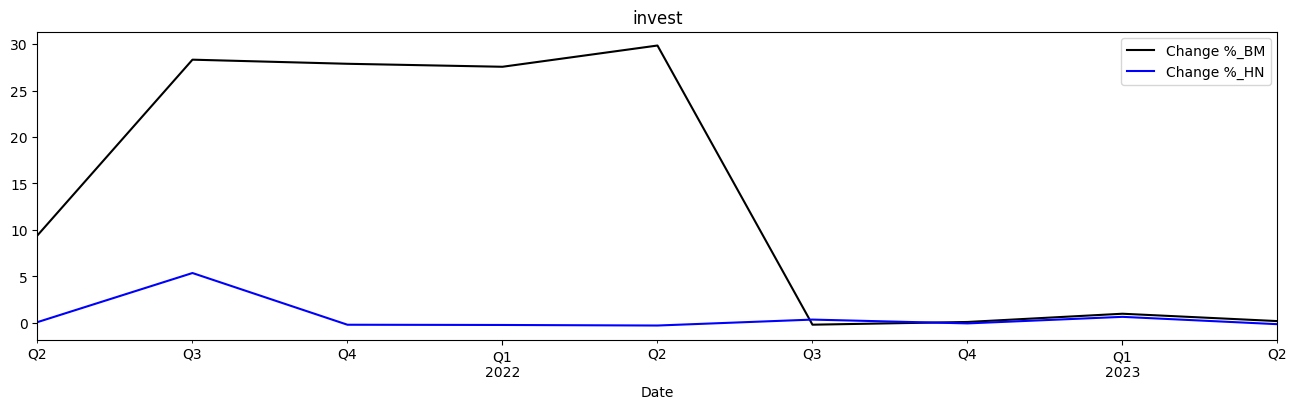

In [39]:
#BM과 HN의 변동량 차이 
fig, ax = plt.subplots(figsize=(16,4))
(
    invest
    .resample('Qs')
    [['Change %_BM','Change %_HN']]
    .sum()
    .plot(color=['black','blue'],ax=ax, title='invest')
)

<AxesSubplot:xlabel='Date'>

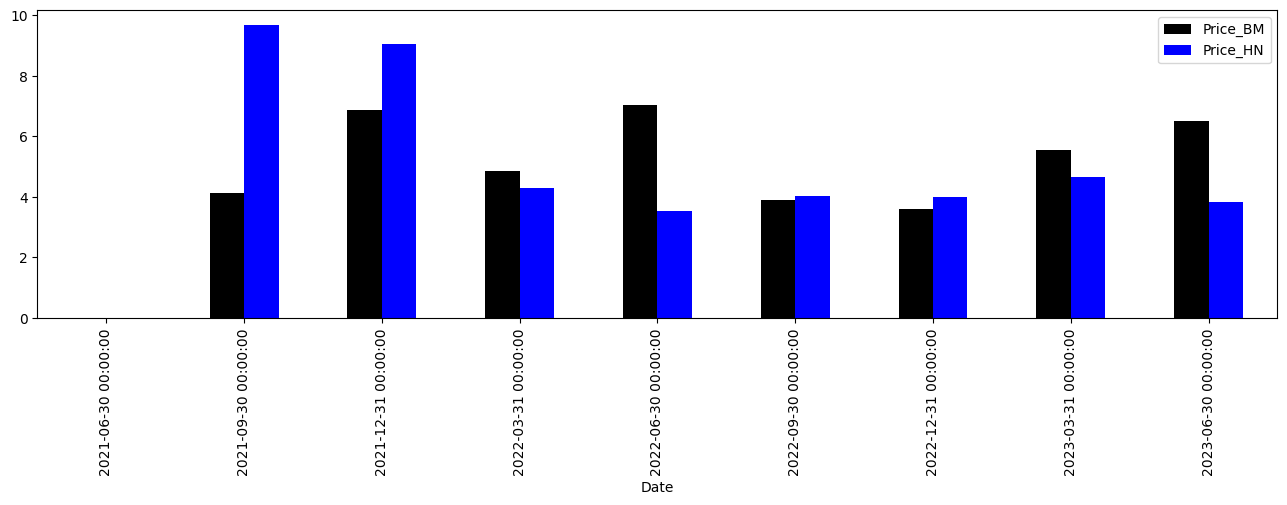

In [27]:
4

<AxesSubplot:xlabel='Date'>

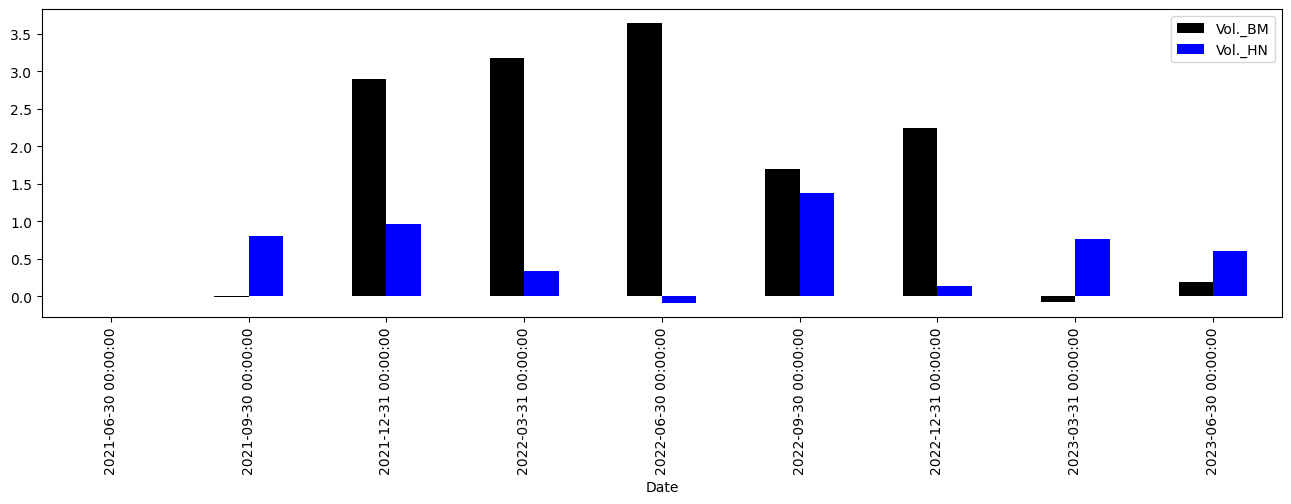

In [52]:
invest_begin=(
    invest.resample('Q')
    [['Vol._BM','Vol._HN']]
    .sum()
    .iloc[0]
)

fig, ax = plt.subplots(figsize=(16,4))
(
    invest
    .resample('Q')
    [['Vol._BM','Vol._HN']]
    .sum()
    .div(invest_begin)
    .sub(1)
    .round(2)
    .plot.bar(color=['black','blue'],ax=ax)
)

<AxesSubplot:xlabel='Date'>

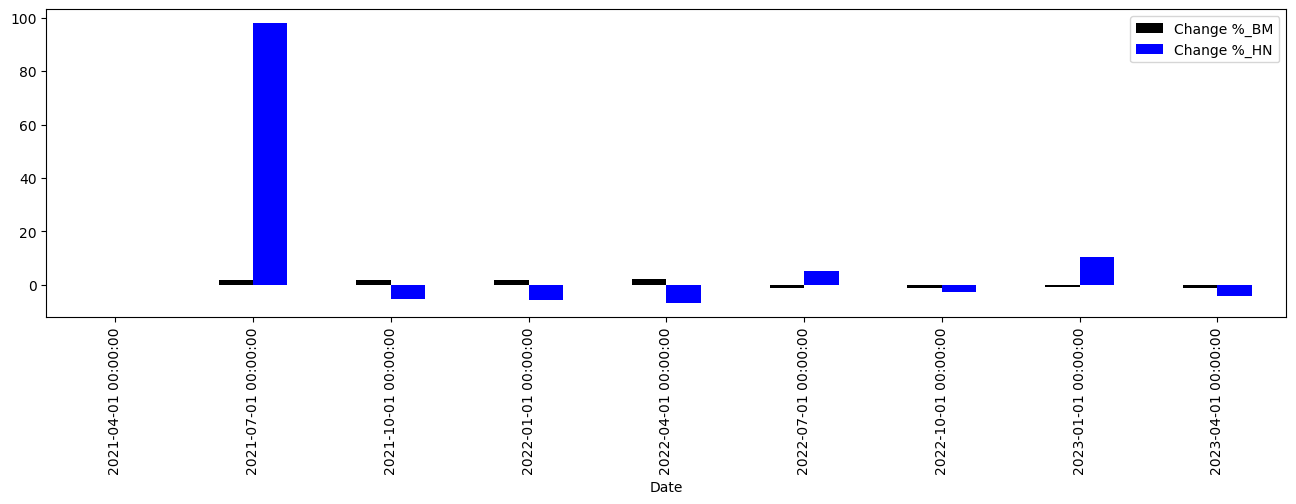

In [54]:
invest_begin=(
    invest.resample('Q')
    [['Change %_BM','Change %_HN']]
    .sum()
    .iloc[0]
)

fig, ax = plt.subplots(figsize=(16,4))
(
    invest
    .resample('Q')
    [['Change %_BM','Change %_HN']]
    .sum()
    .div(invest_begin)
    .sub(1)
    .round(2)
    .plot.bar(color=['black','blue'],ax=ax)
)